In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("C:/Users/matiyariazz/Desktop/Wisconsin_Breast_Cancer_Data_Classification_CSV.csv")
data.info(verbose=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Columns: 32 entries, id to fractal_dimension_worst
dtypes: float64(30), int64(1), object(1)
memory usage: 142.4+ KB


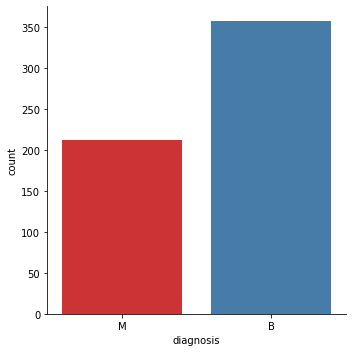

In [6]:
sns.catplot(x="diagnosis", kind="count", palette="Set1", data=data)
plt.show()


In [7]:

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

X = data.drop(["diagnosis"], axis=1)
Y = data.diagnosis.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)


In [8]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
clf.fit(x_train, y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [9]:
y_pred_SVM_train = clf.predict(x_train)
y_pred_SVM_test = clf.predict(x_test)

accuracy_SVM_train = r2_score(y_train, y_pred_SVM_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_SVM_train)

accuracy_SVM_test = r2_score(y_test, y_pred_SVM_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_SVM_test)


Training Accuracy for Multiple Linear Regression Model:  0.9439148656422056
Testing Accuracy for Multiple Linear Regression Model:  0.922972972972973


In [11]:
def confusion_matrix(true, pred):
    K = len(np.unique(true))  # Number of classes
    result = np.zeros((K, K))
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    return result
con_mtx = confusion_matrix(y_test, y_pred_SVM_test)

print(con_mtx)

[[73.  1.]
 [ 1. 39.]]


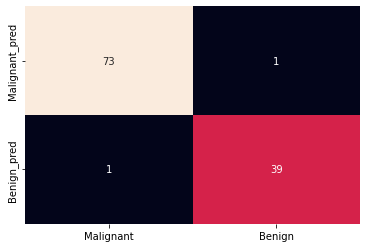

In [12]:
con_df = pd.DataFrame(con_mtx, columns=['Malignant', 'Benign'], index=['Malignant_pred', 'Benign_pred'])
sns.heatmap(con_df, annot=True, cbar=False)
plt.show()